<a href="https://colab.research.google.com/github/Shazma-Aslam/ML_projects/blob/main/decisio_tree_regresser_feature_extraction_and_apply_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mujahidashraf/data/refs/heads/main/insurance.csv")

In [ ]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
X = df[['age','sex','bmi','children','smoker','region']]
y = df['expenses']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [ ]:
predicted = regressor.predict(X_test)
mae = mean_absolute_error(y_test , predicted)
mse = mean_squared_error(y_test , predicted)
rmse = np.sqrt(mse)
r2=r2_score(y_test , predicted)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(100*'_')


MAE: 2933.192487562189
MSE: 42947218.10312189
RMSE: 6553.412706607291
R2: 0.7070934663361155
____________________________________________________________________________________________________


[Text(0.5, 0.8333333333333334, 'x[4] <= 0.5\nsquared_error = 146468392.93\nsamples = 936\nvalue = 13379.157'),
 Text(0.25, 0.5, 'x[0] <= 42.5\nsquared_error = 37221996.763\nsamples = 741\nvalue = 8542.875'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[2] <= 29.95\nsquared_error = 134977948.508\nsamples = 195\nvalue = 31757.029'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

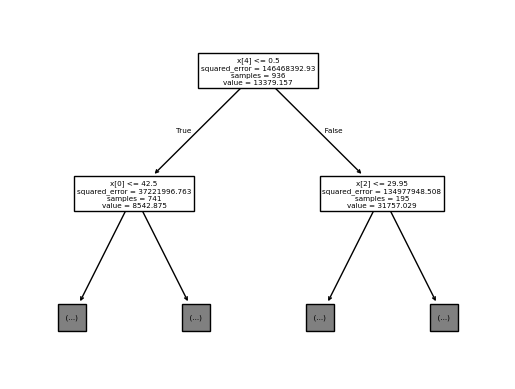

In [ ]:
tree.plot_tree(regressor, max_depth=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
dt = DecisionTreeRegressor()

# Parameter grid
param_grid = {
    'ccp_alpha': [0.0],
    'criterion': ['squared_error'],
    'max_depth': [5, 10, None],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42],
    'splitter': ['best']
}

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='r2', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Results
print("Best parameters:", grid_search.best_params_)


# Test evaluation
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Test R² Score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Test R² Score: 0.8594369540424764


In [ ]:
regressor1 = DecisionTreeRegressor(random_state=42)
regressor1.set_params(**grid_search.best_params_)
regressor1.fit(X_train_scaled, y_train)
predicted = regressor1.predict(X_test_scaled)
mae = mean_absolute_error(y_test , predicted)
mse = mean_squared_error(y_test , predicted)
rmse = np.sqrt(mse)
r2=r2_score(y_test , predicted)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(100*'_')

MAE: 2647.5641823046035
MSE: 20609959.485930204
RMSE: 4539.819323049123
R2: 0.8594369540424764
____________________________________________________________________________________________________


In [ ]:
# Get Feature Importance
feature_importance = regressor1.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
feature_df = feature_df.sort_values(by="Importance", ascending=False)
print(feature_df)
selected_features = feature_df[feature_df['Importance'] > 0.002]['Feature'].tolist()
X_selected = df[selected_features]
X_selected.head()

    Feature  Importance
4    smoker    0.692468
2       bmi    0.176869
0       age    0.121247
3  children    0.006734
5    region    0.002682
1       sex    0.000000


,smoker,bmi,age,children,region
0,1,27.9,19,0,3
1,0,33.8,18,1,2
2,0,33.0,28,3,2
3,0,22.7,33,0,1
4,0,28.9,32,0,1


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_selected, y, test_size = 0.3, random_state = 10)

In [ ]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

regressor12 = DecisionTreeRegressor(random_state=42)
regressor12.set_params(**grid_search.best_params_)
regressor12.fit(X_train_scaled1, y_train1)
predicted = regressor12.predict(X_test_scaled1)
mae = mean_absolute_error(y_test1 , predicted)
mse = mean_squared_error(y_test1 , predicted)
rmse = np.sqrt(mse)
r2=r2_score(y_test1 , predicted)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(100*'_')

MAE: 2607.375303950224
MSE: 20762533.903855726
RMSE: 4556.592356559419
R2: 0.8401134081230651
____________________________________________________________________________________________________


In [ ]:
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Define regression models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "KNNRegressor": KNeighborsRegressor(n_neighbors=5),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=5),
}

# Store results
results = {}

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        # Create pipeline
        pipeline = Pipeline([
            ("scaler", scaler),
            ("regressor", model)
        ])

        # Train model
        pipeline.fit(X_train, y_train)

        # Predict
        y_pred = pipeline.predict(X_test)
        #if model_name=="DecisionTreeRegressor":
          #print(pipeline.named_steps['regressor'].get_params())

        # Evaluate performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results[f"{model_name} with {scaler_name}"] = {"MSE": mse, "R2 Score": r2}


In [ ]:
for model, metrics in results.items():
  print(f"{model}: ")
  print(f"MSE = {metrics['MSE']:.4f}, R2 Score = {metrics['R2 Score']:.4f}")

LinearRegression with StandardScaler: 
MSE = 33802383.5549, R2 Score = 0.7695
Lasso with StandardScaler: 
MSE = 33802324.1918, R2 Score = 0.7695
Ridge with StandardScaler: 
MSE = 33805133.8765, R2 Score = 0.7694
ElasticNet with StandardScaler: 
MSE = 34178067.0258, R2 Score = 0.7669
KNNRegressor with StandardScaler: 
MSE = 25275990.0444, R2 Score = 0.8276
DecisionTreeRegressor with StandardScaler: 
MSE = 20869582.3142, R2 Score = 0.8577
LinearRegression with MinMaxScaler: 
MSE = 33802383.5549, R2 Score = 0.7695
Lasso with MinMaxScaler: 
MSE = 33802131.5286, R2 Score = 0.7695
Ridge with MinMaxScaler: 
MSE = 33791848.7582, R2 Score = 0.7695
ElasticNet with MinMaxScaler: 
MSE = 42886139.3394, R2 Score = 0.7075
KNNRegressor with MinMaxScaler: 
MSE = 29563314.4081, R2 Score = 0.7984
DecisionTreeRegressor with MinMaxScaler: 
MSE = 20869582.3142, R2 Score = 0.8577
LinearRegression with RobustScaler: 
MSE = 33802383.5549, R2 Score = 0.7695
Lasso with RobustScaler: 
MSE = 33802310.0332, R2 Scor

In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex','smoker','region'])
X = df_encoded.drop(columns=['expenses'])
y = df_encoded['expenses']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)





DecisionTreeRegressor(random_state=42)

In [ ]:
predicted = regressor.predict(X_test)
mae = mean_absolute_error(y_test , predicted)
mse = mean_squared_error(y_test , predicted)
rmse = np.sqrt(mse)
r2=r2_score(y_test , predicted)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(100*'_')


MAE: 2756.263980099503
MSE: 38166181.42160597
RMSE: 6177.878391616815
R2: 0.7397008607973858
____________________________________________________________________________________________________


[Text(0.5, 0.8333333333333334, 'x[6] <= 0.5\nsquared_error = 146468392.93\nsamples = 936\nvalue = 13379.157'),
 Text(0.25, 0.5, 'x[0] <= 42.5\nsquared_error = 37221996.763\nsamples = 741\nvalue = 8542.875'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[1] <= 29.95\nsquared_error = 134977948.508\nsamples = 195\nvalue = 31757.029'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

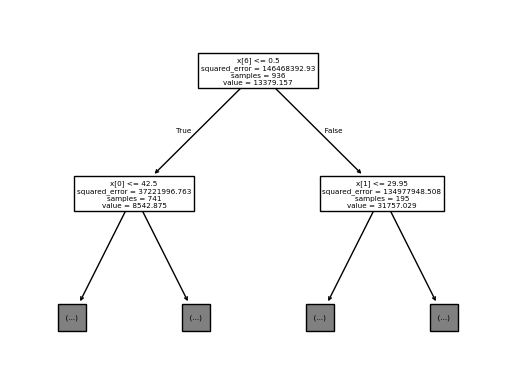

In [ ]:
tree.plot_tree(regressor,max_depth=1)

In [ ]:
# Get Feature Importance
feature_importance = regressor.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
feature_df = feature_df.sort_values(by="Importance", ascending=False)
print(feature_df)
selected_features = feature_df[feature_df['Importance'] > 0.01]['Feature'].tolist()
X_selected = df_encoded[selected_features]
X_selected.head()

     Feature  Importance
6   smoker_1    0.606824
1        bmi    0.207776
0        age    0.132428
2   children    0.019703
9   region_2    0.007402
4      sex_1    0.006111
7   region_0    0.005921
8   region_1    0.005468
10  region_3    0.004467
3      sex_0    0.003898
5   smoker_0    0.000000


,smoker_1,bmi,age,children
0,True,27.9,19,0
1,False,33.8,18,1
2,False,33.0,28,3
3,False,22.7,33,0
4,False,28.9,32,0


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state = 10)

In [ ]:
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Define regression models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "KNNRegressor": KNeighborsRegressor(n_neighbors=5),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=5),
}

# Store results
results2 = {}

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        # Create pipeline
        pipeline = Pipeline([
            ("scaler", scaler),
            ("regressor", model)
        ])

        # Train model
        pipeline.fit(X_train, y_train)

        # Predict
        y_pred = pipeline.predict(X_test)

        # Evaluate performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results2[f"{model_name} with {scaler_name}"] = {"MSE": mse, "R2 Score": r2}

In [ ]:
for model, metrics in results2.items():
  print(f"{model}: ")
  print(f"MSE = {results[model]['MSE']:.4f}, R2 Score = {results[model]['R2 Score']:.4f}")
  print(f"MSE = {metrics['MSE']:.4f}, R2 Score = {metrics['R2 Score']:.4f}")

LinearRegression with StandardScaler: 
MSE = 33802383.5549, R2 Score = 0.7695
MSE = 33777093.1008, R2 Score = 0.7696
Lasso with StandardScaler: 
MSE = 33802324.1918, R2 Score = 0.7695
MSE = 33777097.0443, R2 Score = 0.7696
Ridge with StandardScaler: 
MSE = 33805133.8765, R2 Score = 0.7694
MSE = 33777655.8082, R2 Score = 0.7696
ElasticNet with StandardScaler: 
MSE = 34178067.0258, R2 Score = 0.7669
MSE = 33903045.5991, R2 Score = 0.7688
KNNRegressor with StandardScaler: 
MSE = 25275990.0444, R2 Score = 0.8276
MSE = 29402812.2203, R2 Score = 0.7995
DecisionTreeRegressor with StandardScaler: 
MSE = 20869582.3142, R2 Score = 0.8577
MSE = 20957331.4924, R2 Score = 0.8571
LinearRegression with MinMaxScaler: 
MSE = 33802383.5549, R2 Score = 0.7695
MSE = 33777093.1008, R2 Score = 0.7696
Lasso with MinMaxScaler: 
MSE = 33802131.5286, R2 Score = 0.7695
MSE = 33777001.6757, R2 Score = 0.7696
Ridge with MinMaxScaler: 
MSE = 33791848.7582, R2 Score = 0.7695
MSE = 33756421.3007, R2 Score = 0.7698
El